**Name** : Bodhisatya Ghosh \
**Class** : CSE DS \
**UID** : 2021700026 \
**Subject** : NLP \
**Experiment number** : 1 \
\
**Aim**: Create Frequency distribution table of input text & learn about morphological features of a word by analysing it.

In [169]:
import pandas as pd
import nltk

### Data cleaning

In [170]:
data = pd.read_csv('./reviews.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [171]:
data['review'] = data['review'].str.replace(r'[^A-Za-z0-9]',' ',regex=True)
data['review'] = data['review'].str.replace(r'\s+',' ',regex=True)
data['review'] = data['review'].str.lower()
reviews = data['review']


In [172]:
with open('sample.txt','w') as file:
    file.write(reviews[1])

## Frequency distribution of sentence

In [173]:
from nltk import word_tokenize
from nltk.probability import FreqDist

In [174]:
with open('sample.txt','r') as file:
    sentence = file.read()

In [175]:
# sentence = input("Enter the sentence")

In [176]:
words = word_tokenize(sentence)
frequ = dict(FreqDist(words))

In [177]:
word = []
frequency = []
for i in frequ:
    word.append(i)
    frequency.append(frequ[i])
freq = pd.DataFrame({'Word':word,'Freq':frequency})

In [178]:

freq.sort_values(by = ['Freq'], inplace=True, ascending=False)
freq.reset_index(inplace=True)
freq.drop(columns=['index'], inplace  = True)

In [179]:
import matplotlib.pyplot as plt

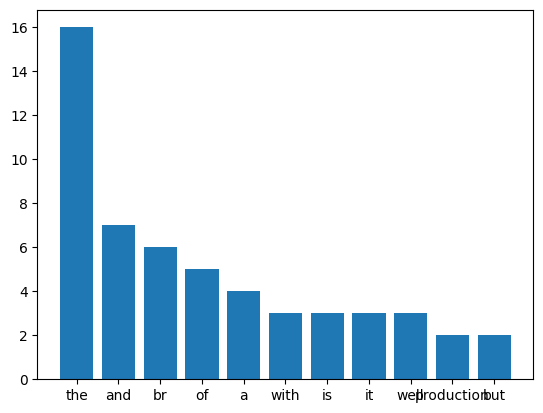

In [180]:
count = 10
plt.bar(x = freq.loc[:count,'Word'],height=freq.loc[:count,'Freq'])
plt.show()

## Morphology

In [181]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')

from nltk.tag import pos_tag

import random 
from nltk.corpus import names 

In [182]:
sentence = sentence.split(' ')

In [183]:
original = []
stemmed = []
lemma = []
category = []
gender = []
number = []
tense = []

In [184]:
cnt = 0
for i in words:
    original.append(i)
    stemmed.append(stemmer.stem(i))
    lemma.append(lemmatizer.lemmatize(i))
    category.append(nltk.pos_tag(words)[cnt][1])
    if(nltk.pos_tag(words)[cnt][1] == 'NNS'):
        number.append('Plural')
    else:
        number.append('singular')

    if(nltk.pos_tag(words)[cnt][1] == "MD"):
        tense.append('future')
    elif(nltk.pos_tag(words)[cnt][1] in ["VBP", "VBZ","VBG"]):
        tense.append('present')
    elif(nltk.pos_tag(words)[cnt][1] in ["VBD", "VBN"]):
        tense.append('past')
    else:
        tense.append('not verb')
    cnt+=1

In [185]:
  
def gender_features(word): 
    return {'last_letter':word[-1]} 
  
# preparing a list of examples and corresponding class labels. 
labeled_names = ([(name, 'male') for name in names.words('male.txt')]+
             [(name, 'female') for name in names.words('female.txt')]) 
  
random.shuffle(labeled_names) 
  
# we use the feature extractor to process the names data. 
featuresets = [(gender_features(n), gender)  
               for (n, gender)in labeled_names] 
  
# Divide the resulting list of feature 
# sets into a training set and a test set. 
train_set, test_set = featuresets[500:], featuresets[:500] 
  
# The training set is used to  
# train a new "naive Bayes" classifier. 
classifier = nltk.NaiveBayesClassifier.train(train_set) 

for i in words:
    gender.append(classifier.classify(gender_features(i))) 
  
# output should be 'male' 
# print(nltk.classify.accuracy(classifier, train_set))

In [186]:
len(original)

166

In [187]:
final = pd.DataFrame({"Original":original,
                      "Stemmed":stemmed,
                      "Lemmatized":lemma,
                      "Category":category,
                      "Gender":gender,
                      "Number":number,
                      "Tense":tense})

In [188]:
final

,Original,Stemmed,Lemmatized,Category,Gender,Number,Tense
0,a,a,a,DT,female,singular,not verb
1,wonderful,wonder,wonderful,JJ,male,singular,not verb
2,little,littl,little,JJ,female,singular,not verb
3,production,product,production,NN,male,singular,not verb
4,br,br,br,NN,male,singular,not verb
...,...,...,...,...,...,...,...
161,surface,surfac,surface,NN,female,singular,not verb
162,are,are,are,VBP,female,singular,present
163,terribly,terribl,terribly,RB,female,singular,not verb
164,well,well,well,RB,male,singular,not verb


## Questions

### What is Natural language processing? Discuss various levels of analysis under it with example.

Natural Language Processing (NLP) is a field of artificial intelligence (AI) that focuses on the interaction between computers and human language. It involves the development of algorithms and models that enable machines to understand, interpret, and generate human-like text. NLP encompasses a range of tasks, and different levels of analysis are applied to process language effectively. Here are various levels of analysis in NLP with examples:

1. **Morphological Analysis:**
   - *Definition:* Deals with the structure and formation of words.
   - *Example:* Breaking down the word "unhappiness" into its components: "un-" (prefix), "happy" (root), and "-ness" (suffix).

2. **Lexical Analysis:**
   - *Definition:* Involves the analysis of individual words, their meaning, and relationships.
   - *Example:* Understanding that "run" and "sprint" have similar meanings, while "run" and "eat" do not.

3. **Syntactic Analysis:**
   - *Definition:* Focuses on the arrangement of words to form grammatically correct sentences.
   - *Example:* Identifying the structure of a sentence, such as subject-verb-object relationships. For instance, in "The cat chased the mouse," the syntactic structure is clear.

4. **Semantic Analysis:**
   - *Definition:* Involves understanding the meaning of words, phrases, and sentences.
   - *Example:* Recognizing that "bank" can refer to a financial institution or the side of a river, depending on the context.

5. **Pragmatic Analysis:**
   - *Definition:* Considers the interpretation of language in context, including speaker intentions.
   - *Example:* Understanding the implied meaning in an utterance, such as recognizing sarcasm or humor.

6. **Discourse Analysis:**
   - *Definition:* Examines the structure and organization of connected sentences to understand larger units of text.
   - *Example:* Identifying relationships between sentences and paragraphs in a conversation or a document.

7. **Sentiment Analysis:**
   - *Definition:* Determines the emotional tone expressed in a piece of text.
   - *Example:* Analyzing customer reviews to identify whether they express positive, negative, or neutral sentiments toward a product.

8. **Practical Application - Question Answering:**
   - *Example:* Creating a neural network based on your dataset to answer questions with complete sentences. The model would need to comprehend the input question, extract relevant information from the training data, and generate a coherent and contextually appropriate response.

###  What do you mean by ambiguity in NLP? Explain with suitable example. Discuss various ways to resolve ambiguity in NLP

In Natural Language Processing (NLP), ambiguity refers to situations where a given text or expression can have multiple interpretations or meanings. It is a common challenge in language understanding, as words or phrases may have different senses or contexts, leading to uncertainty in interpretation. Let's explore ambiguity in NLP with an example and discuss various ways to resolve it:

**Example of Ambiguity:**
Consider the sentence "I saw her standing by the bank." Here, the word "bank" has multiple meanings—it could refer to the financial institution or the side of a river. Without additional context, it is unclear which interpretation is correct.

**Ways to Resolve Ambiguity in NLP:**

1. **Contextual Analysis:**
   - **Approach:** Take into account the surrounding context to disambiguate the meaning of words.
   - **Example:** Analyzing the words before and after "bank" in the sentence to determine if it refers to a financial institution or the side of a river.

2. **Word Sense Disambiguation (WSD):**
   - **Approach:** Use techniques to identify the correct sense or meaning of a word based on its context.
   - **Example:** Utilizing algorithms that consider context, part-of-speech tags, and semantic relationships to disambiguate the meaning of ambiguous words.

3. **Statistical Models:**
   - **Approach:** Train statistical models on large datasets to learn the most probable interpretation of ambiguous phrases.
   - **Example:** Employing machine learning models, such as Naive Bayes or Support Vector Machines, to predict the sense of ambiguous words based on contextual features.

4. **Semantic Role Labeling (SRL):**
   - **Approach:** Identifying the roles of words in a sentence and their relationships to resolve ambiguity.
   - **Example:** Determining whether "standing" is associated with "her" or "bank" by analyzing the semantic roles of each word in the sentence.

5. **Dependency Parsing:**
   - **Approach:** Analyzing the syntactic structure and dependencies between words to uncover relationships and disambiguate meanings.
   - **Example:** Parsing the sentence to understand the grammatical relationships between words and disambiguate based on syntactic structure.

6. **Coreference Resolution:**
   - **Approach:** Resolving references to entities mentioned in the text to improve clarity.
   - **Example:** Identifying that "her" refers to a specific person mentioned earlier in the text, which might help in disambiguating the meaning of "bank."

7. **Knowledge Base Integration:**
   - **Approach:** Incorporating external knowledge bases to provide additional information for disambiguation.
   - **Example:** Utilizing a knowledge base to check if the location mentioned has a river, which could aid in determining the correct interpretation of "bank."

Resolving ambiguity in NLP often involves a combination of these approaches, and the choice depends on the specific characteristics of the task and the available data. Advanced techniques, such as deep learning models, may also be employed for more complex language understanding tasks.

### What is morphology with examples?

Morphology is the linguistic study of the structure and formation of words. It deals with the smallest units of meaning in a language, called morphemes, and how these morphemes combine to create words. Morphology examines the rules governing the internal structure of words, including affixes, roots, and stems. Here are some key concepts in morphology with examples:

1. **Morpheme:**
   - *Definition:* The smallest unit of meaning in a language.
   - *Example:* In the word "unhappiness," there are three morphemes: "un-" (a prefix indicating negation), "happy" (a root or base word), and "-ness" (a suffix indicating a state or quality).

2. **Affix:**
   - *Definition:* A morpheme attached to a root word to modify its meaning.
   - *Example:* In the word "untie," "un-" is a prefix attached to "tie," indicating the negation of the action.

3. **Root:**
   - *Definition:* The core or base morpheme that carries the primary meaning of a word.
   - *Example:* In the word "happiness," "happy" is the root that conveys the main idea.

4. **Stem:**
   - *Definition:* The base form of a word to which affixes can be added.
   - *Example:* In the word "running," "run" is the stem to which the suffix "-ing" is added to indicate the ongoing action.

5. **Prefix:**
   - *Definition:* An affix added to the beginning of a word.
   - *Example:* In the word "preheat," "pre-" is a prefix indicating that the heating occurs before the main action.

6. **Suffix:**
   - *Definition:* An affix added to the end of a word.
   - *Example:* In the word "happily," "-ly" is a suffix added to "happy" to form an adverb.

7. **Infix:**
   - *Definition:* A morpheme inserted into the middle of a word.
   - *Example:* In some languages, infixes may be used for grammatical purposes. However, infixes are less common in English.

8. **Derivation:**
   - *Definition:* The process of creating a new word by adding affixes to an existing word.
   - *Example:* "Happy" can be derived into "unhappy" by adding the prefix "un-."

9. **Inflection:**
   - *Definition:* The modification of a word to convey grammatical information such as tense, number, or gender.
   - *Example:* In English, adding "-s" to "cat" to form "cats" indicates the plural form.

10. **Compounding:**
    - *Definition:* The formation of a new word by combining two or more existing words.
    - *Example:* "Toothpaste" is formed by compounding "tooth" and "paste."

### Discuss discourse and pragmatic analysis. Discuss reference resolution problem in detail.

**Discourse Analysis:**
Discourse analysis is the study of language use in its context, focusing on the structure and organization of extended pieces of text, such as conversations, speeches, or written documents. It aims to understand how language functions beyond the sentence level, examining relationships between sentences, coherence, and the overall communicative intent. Discourse analysis involves the analysis of linguistic features, such as cohesion, coherence, and discourse markers, to uncover patterns and meanings in larger units of language.

**Pragmatic Analysis:**
Pragmatics is the study of how context influences the interpretation of language. It goes beyond the literal meaning of words and examines how speakers use language to convey meaning based on the context, speaker intentions, and the social context of communication. Pragmatic analysis includes the study of speech acts, implicature, deixis, and other phenomena that contribute to effective communication.

**Reference Resolution Problem:**
Reference resolution is a subtask within pragmatics and involves identifying the entities or elements to which pronouns, definite noun phrases, or other referring expressions refer in a given context. It is a crucial aspect of language understanding, as resolving references correctly is essential for coherent communication. The problem becomes particularly challenging when there is ambiguity or multiple possible referents for a given expression.

**Example:**
Consider the sentence: "John told Mary he would visit her tomorrow." Here, the reference resolution problem arises with the pronouns "he" and "her." The goal is to determine who "he" refers to and who "her" refers to. Resolving these references correctly is vital for understanding the intended meaning of the sentence.

**Ways to Address Reference Resolution:**

1. **Contextual Analysis:**
   - Analyze the surrounding context to identify potential referents.
   - Consider information from previous sentences or discourse to establish connections.

2. **Semantic Role Labeling (SRL):**
   - Assign roles to entities in a sentence to understand their relationships.
   - Identify the agent, patient, or other semantic roles to aid in reference resolution.

3. **Coreference Resolution:**
   - Determine when two or more expressions refer to the same entity.
   - Utilize machine learning models or rule-based systems to predict coreference relationships.

4. **Knowledge Base Integration:**
   - Incorporate external knowledge bases to enhance reference resolution.
   - Verify references against a knowledge base to check for consistency and accuracy.

5. **Anaphora and Cataphora Resolution:**
   - Address anaphoric references (backward references) and cataphoric references (forward references).
   - Understand the relationships between pronouns and their antecedents or postcedents.

6. **Syntactic Analysis:**
   - Use information from the syntactic structure of sentences to identify potential referents.
   - Analyze the grammatical relationships between words to aid in reference resolution.

7. **Discourse Coherence:**
   - Consider discourse coherence to establish connections between sentences.
   - Analyze discourse markers and other cohesive devices to understand the flow of information.

8. **Machine Learning Approaches:**
   - Employ machine learning models, such as neural networks, for end-to-end reference resolution.
   - Train models on annotated datasets to learn patterns and relationships for accurate resolution.


## Conclusion

In this experiment I have learnt how to break a word down into its morphological features and analayse it using NLTK libraries 